In [53]:
import rasterio
from pysheds.grid import Grid

# Open the raster file with rasterio to check the CRS
with rasterio.open(r'data-inputs\\Scalgo7P.tif') as src:
    crs = src.crs
    print(f"CRS: {crs}")

# Load the grid
grid = Grid.from_raster(r'data-inputs\\Scalgo7P.tif')

# Read the raster
dem = grid.read_raster(r'data-inputs\\Scalgo7P.tif')

# You can now use the CRS information as needed
print(f"Grid CRS: {grid.crs}")

CRS: EPSG:3087
Grid CRS: PROJCS["NAD83(HARN) / Florida GDL Albers",GEOGCS["NAD83(HARN)",DATUM["NAD83_High_Accuracy_Reference_Network",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6152"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4152"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",24],PARAMETER["longitude_of_center",-84],PARAMETER["standard_parallel_1",24],PARAMETER["standard_parallel_2",31.5],PARAMETER["false_easting",400000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3087"]]


In [ ]:
# from pysheds.grid import Grid

# grid = Grid.from_raster(r'data-inputs\\Scalgo7.tif')
# dem = grid.read_raster(r'data-inputs\\Scalgo7.tif')

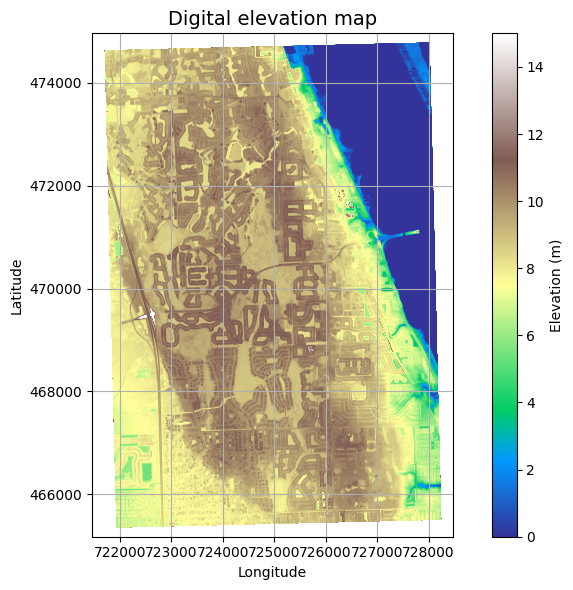

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Define the normalization for the elevation between 0 and 15 meters
norm = colors.Normalize(vmin=0, vmax=15)

fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

# Plot the DEM with normalization applied
plt.imshow(dem, extent=grid.extent, cmap='terrain', norm=norm, zorder=1)
#plt.imshow(dem, extent=grid.extent, cmap='terrain', zorder=1)
plt.colorbar(label='Elevation (m)')
plt.grid(zorder=0)
plt.title('Digital elevation map', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

In [55]:
# Read ponds shapefile
import pandas as pd
import geopandas as gpd
from shapely import geometry, ops
ponds = gpd.read_file(r'data-inputs\\IRL-Ponds-Export\\IRL-Ponds-Export.shp')
# print(ponds.head())



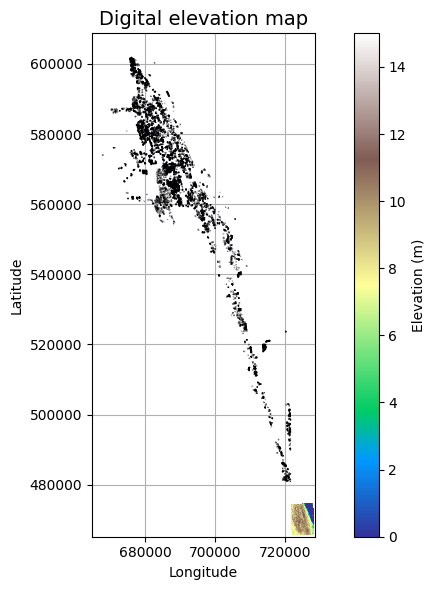

In [71]:
import pandas as pd
import geopandas as gpd
from shapely import geometry, ops
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Read the ponds shapefile
ponds = gpd.read_file(r'data-inputs\\IRL-Ponds-Export\\IRL-Ponds-Export.shp')

# Define the normalization for the elevation between 0 and 15 meters
norm = colors.Normalize(vmin=0, vmax=15)

# Clip the ponds layer to the DEM extent
dem_bounds = geometry.box(*grid.extent)
ponds_clipped = gpd.clip(ponds, dem_bounds)

fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

# Plot the DEM with normalization applied
plt.imshow(dem, extent=grid.extent, cmap='terrain', norm=norm, zorder=1)
plt.colorbar(label='Elevation (m)')
plt.grid(zorder=0)
plt.title('Digital elevation map', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Plot the clipped ponds shapefile
ponds_clipped.plot(ax=ax, color='blue', edgecolor='black', zorder=2)

plt.tight_layout()
plt.show()


C:\Users\alden.summerville\AppData\Local\Temp\ipykernel_30180\2692453430.py:13: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


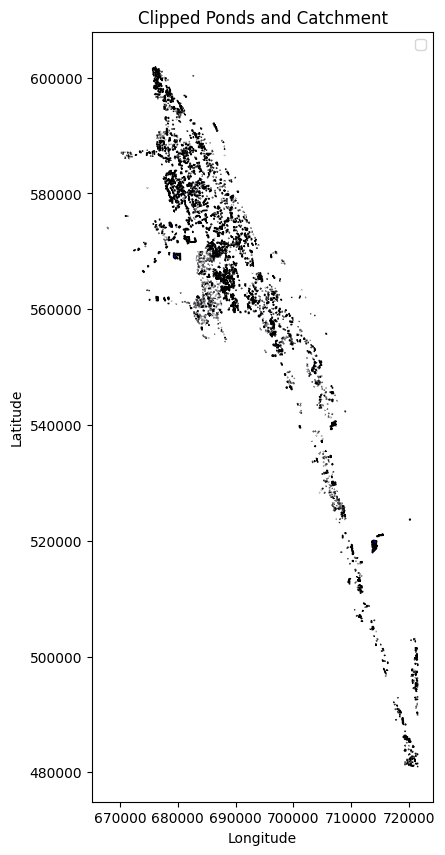

In [72]:
# Plot the clipped ponds
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the clipped ponds
ponds_clipped.plot(ax=ax, color='blue', edgecolor='black', label='Clipped Ponds')

# Set plot title and labels
ax.set_title('Clipped Ponds and Catchment')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add legend
ax.legend()

# Show the plot
plt.show()

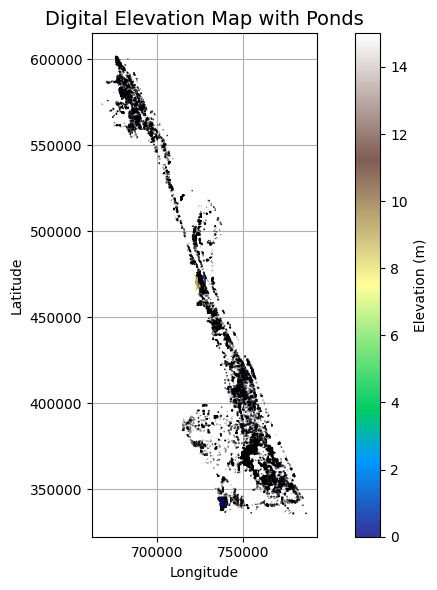

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import geopandas as gpd

# Assuming 'dem' is a numpy array containing the digital elevation model data
# Assuming 'grid' is an object that has an 'extent' attribute defining the extent of the DEM
# Assuming 'ponds' is the GeoDataFrame containing the pond layer

# Define the normalization for the elevation between 0 and 15 meters
norm = colors.Normalize(vmin=0, vmax=15)

fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_alpha(0)

# Plot the DEM with normalization applied
plt.imshow(dem, extent=grid.extent, cmap='terrain', norm=norm, zorder=1)
plt.colorbar(label='Elevation (m)')
plt.grid(zorder=0)

# Plot the pond layer
ponds.plot(ax=ax, color='blue', edgecolor='black', zorder=2)

plt.title('Digital Elevation Map with Ponds', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

# Show the plot
plt.show()


In [57]:

pit_filled_dem = grid.fill_pits(dem)

flooded_dem = grid.fill_depressions(pit_filled_dem)
    

inflated_dem = grid.resolve_flats(flooded_dem)

print(inflated_dem.dtype)


dirmap = (64, 128, 1, 2, 4, 8, 16, 32)
    
# fdir = grid.flowdir(inflated_dem, dirmap=dirmap, nodata_out=np.int64(0))

fdir = grid.flowdir(inflated_dem, dirmap=dirmap)

float64


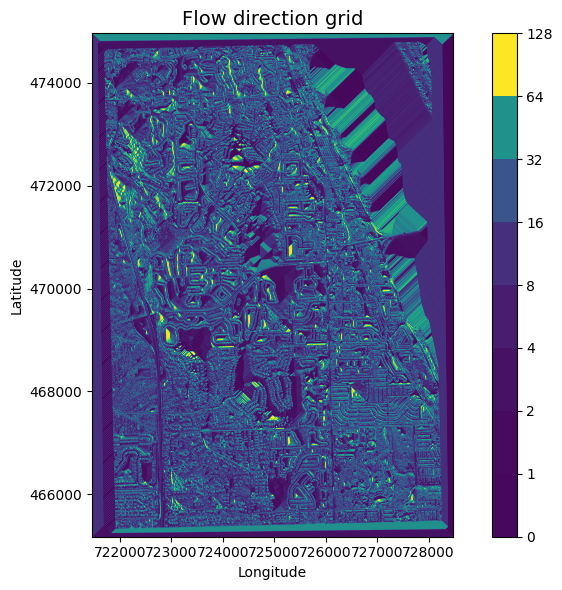

In [58]:
fig = plt.figure(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(fdir, extent=grid.extent, cmap='viridis', zorder=2)
boundaries = ([0] + sorted(list(dirmap)))
plt.colorbar(boundaries= boundaries,
             values=sorted(dirmap))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flow direction grid', size=14)
plt.grid(zorder=-1)
plt.tight_layout()

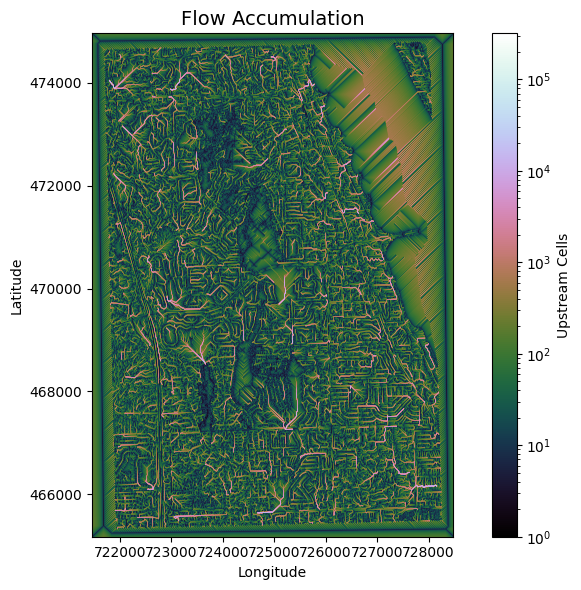

In [59]:

acc = grid.accumulation(fdir, dirmap=dirmap)
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)
plt.grid('on', zorder=0)
im = ax.imshow(acc, extent=grid.extent, zorder=2,
               cmap='cubehelix',
               norm=colors.LogNorm(1, acc.max()),
               interpolation='bilinear')
plt.colorbar(im, ax=ax, label='Upstream Cells')
plt.title('Flow Accumulation', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

Text(0.5, 1.0, 'Delineated Catchment')

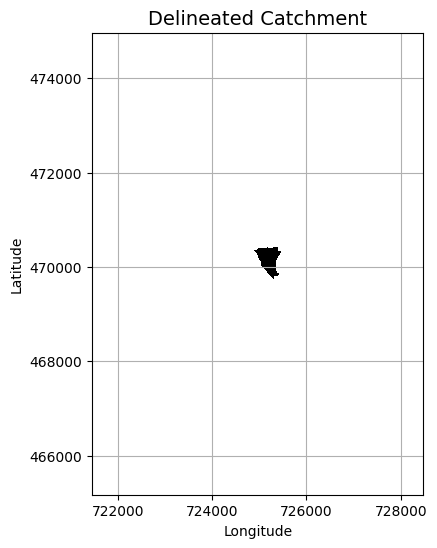

In [69]:
# Joe's point - USGS tif
# x, y = 534750, 3.114

#x, y = 534000, 3.117

# Scalgo7 point
# x, y = 533300, 3.121

# Scalgo7P point
x, y = 726000 , 470000

x_snap, y_snap = grid.snap_to_mask(acc > 250000, (x, y)) #250000

catch = grid.catchment(x=x_snap, y=y_snap, fdir=fdir, dirmap=dirmap, xytype='coordinate')


# grid.clip_to(catch)
# clipped_catch = grid.view(catch)

fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

plt.grid('on', zorder=0)
im = ax.imshow(np.where(catch, catch, np.nan), extent=grid.extent,
               zorder=1, cmap='Greys_r')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Delineated Catchment', size=14)

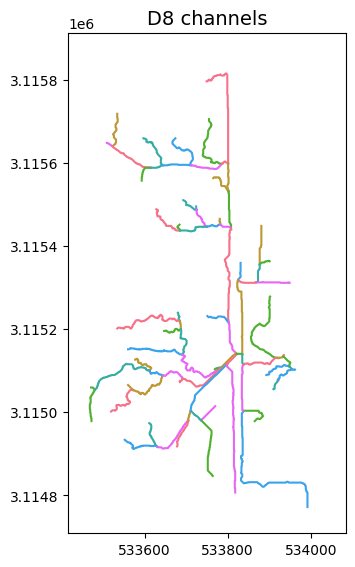

In [7]:

branches = grid.extract_river_network(fdir, acc > 2000, dirmap=dirmap,  nodata_out=np.int64(0))

sns.set_palette('husl')
fig, ax = plt.subplots(figsize=(8.5,6.5))

plt.xlim(grid.bbox[0], grid.bbox[2])
plt.ylim(grid.bbox[1], grid.bbox[3])
ax.set_aspect('equal')

for branch in branches['features']:
    line = np.asarray(branch['geometry']['coordinates'])
    plt.plot(line[:, 0], line[:, 1])
    
_ = plt.title('D8 channels', size=14)

In [8]:
# Find the junctions in the river network

from collections import defaultdict
import numpy as np


node_counts = defaultdict(int)

precision = 10


for branch in branches['features']:
    
    line = np.asarray(branch['geometry']['coordinates'])
    
    
    for point in line:
       
        rounded_point = tuple(np.round(point, precision))
        node_counts[rounded_point] += 1

junctions = [node for node, count in node_counts.items() if count > 1]

print(f"Junction points: {junctions}")

Junction points: [(533801.0, 3115599.0), (533523.0, 3115641.0), (533787.0, 3115599.0), (533642.0, 3115596.0), (533712.0, 3115595.0), (533615.0, 3115589.0), (533802.0, 3115532.0), (533808.0, 3115441.0), (533725.0, 3115488.0), (533750.0, 3115447.0), (533685.0, 3115438.0), (533782.0, 3115452.0), (533802.0, 3115217.0), (533877.0, 3115356.0), (533868.0, 3115313.0), (533825.0, 3115318.0), (533835.0, 3115140.0), (533922.0, 3115131.0), (533685.0, 3115219.0), (533822.0, 3115141.0), (533687.0, 3115200.0), (533691.0, 3115139.0), (533779.0, 3115107.0), (533934.0, 3115135.0), (533612.0, 3115100.0), (533784.0, 3115108.0), (533949.0, 3115110.0), (533923.0, 3115081.0), (533692.0, 3115081.0), (533572.0, 3115054.0), (533480.0, 3115055.0), (533955.0, 3115104.0), (533736.0, 3114981.0), (533644.0, 3115089.0), (533821.0, 3115140.0), (533837.0, 3115004.0), (533631.0, 3114917.0), (533705.0, 3114981.0), (533711.0, 3115004.0), (533799.0, 3115117.0), (533839.0, 3115116.0)]


C:\Users\alden.summerville\AppData\Local\Temp\ipykernel_30180\3922696838.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20b', len(junctions))


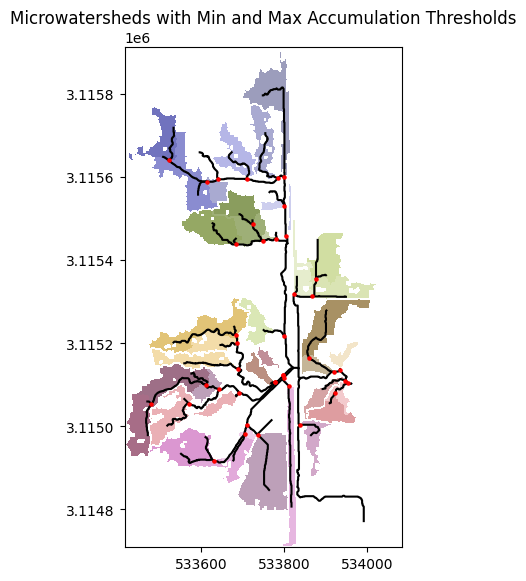

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a figure for plotting all catchments
plt.figure(figsize=(8.5, 6.5))

# Set the plot boundaries and aspect ratio
plt.xlim(grid.bbox[0], grid.bbox[2])
plt.ylim(grid.bbox[1], grid.bbox[3])
plt.gca().set_aspect('equal')

# Define colormap for unique catchment colors
colors = plt.cm.get_cmap('tab20b', len(junctions))

# Define the minimum and maximum accumulation thresholds
min_acc = 1000
max_acc = 20000

# Loop over each junction and plot its catchment
for i, junction in enumerate(junctions):
    x, y = junction
    
    # Snap the junction to the nearest cell where accumulation is between min_acc and max_acc
    mask = (acc > min_acc) & (acc < max_acc)
    x_snap, y_snap = grid.snap_to_mask(mask, (x, y))
    
    # Delineate the catchment for the snapped point
    catch = grid.catchment(x=x_snap, y=y_snap, fdir=fdir, dirmap=dirmap, xytype='coordinate')
    
    # Plot the catchment with a unique color
    plt.imshow(np.where(catch, catch, np.nan), extent=grid.extent, cmap=mcolors.ListedColormap([colors(i)]), alpha=0.5)

# Plot the river network on top of the catchments
for branch in branches['features']:
    line = np.asarray(branch['geometry']['coordinates'])
    plt.plot(line[:, 0], line[:, 1], color='black')

# Highlight all junction points
for junction in junctions:
    x, y = junction
    x_snap, y_snap = grid.snap_to_mask(mask, (x, y))
    plt.scatter(x_snap, y_snap, color='red', s=5, zorder=5)

# Add title and show the combined plot
plt.title('Microwatersheds with Min and Max Accumulation Thresholds')
plt.show()


In [24]:
# Read ponds shapefile
import pandas as pd
import geopandas as gpd
from shapely import geometry, ops
ponds = gpd.read_file(r'data-inputs\\IRL-Ponds-Export\\IRL-Ponds-Export.shp')
# print(ponds.head())

pond_id = 'Pond_ID'
# Convert catchment raster to vector geometry and find intersection
shapes = grid.polygonize()
catchment_polygon = ops.unary_union([geometry.shape(shape)
                                     for shape, value in shapes])
# ponds = ponds[ponds.intersects(catchment_polygon)]
# print(ponds.head())
# catchment_ponds = gpd.GeoDataFrame(ponds[pond_id], 
                                #    geometry=ponds.intersection(catchment_polygon))
# print(catchment_ponds)

# Convert pond types to simple integer values
# pond_types = np.unique(catchment_ponds[pond_id])
# pond_types = pd.Series(np.arange(pond_types.size), index=pond_types)
# catchment_ponds[pond_id] = catchment_ponds[pond_id].map(pond_types)

clipped_ponds = gpd.clip(ponds, catchment_polygon)
print(clipped_ponds.head())


Empty GeoDataFrame
Columns: [Pond, PERMANENT_, AREASQKM, FType, FCode, Visibility, Location, OBJECTID_1, Pond_1, PERMANENT1, FDATE_1, Resolution, GNIS_ID_1, GNIS_NAME_, AREASQKM_1, Elevation_, REACHCODE_, FType_1, FCode_1, Visibili_1, Location_1, Pond_ID, Shape_Leng, Shape_Area, Field, Area_Acres, Shape_Ar_1, Pond_ID_1, Ownership_, Percentage, OBJECTID_2, Join_Count, TARGET_FID, OBJECTID_3, Acres, District, Source, OriginalID, CatchmentI, SUM_Annual, SUM_Annu_1, SUM_Annu_2, SUM_Annu_3, SUM_Annu_4, SUM_Annu_5, SUM_Annu_6, SUM_Annu_7, SUM_Annu_8, SUM_Season, SUM_Seas_1, SUM_Seas_2, SUM_Seas_3, SUM_Seas_4, SUM_Seas_5, SUM_Seas_6, SUM_Seas_7, SUM_Seas_8, Sublagoon, Region, created_us, created_da, last_edite, last_edi_1, GlobalID, Shape_Le_1, FlowToSize, sum_Area_A, Polygon_Co, Shape_Le_2, Shape_Ar_2, TP_and_TN, Shape_Le_3, Shape_Ar_3, Total_N_Ca, Total_P_Ca, Total_N_P_, geometry]
Index: []

[0 rows x 77 columns]


AttributeError: 'ListedColormap' object has no attribute 'LogNorm'

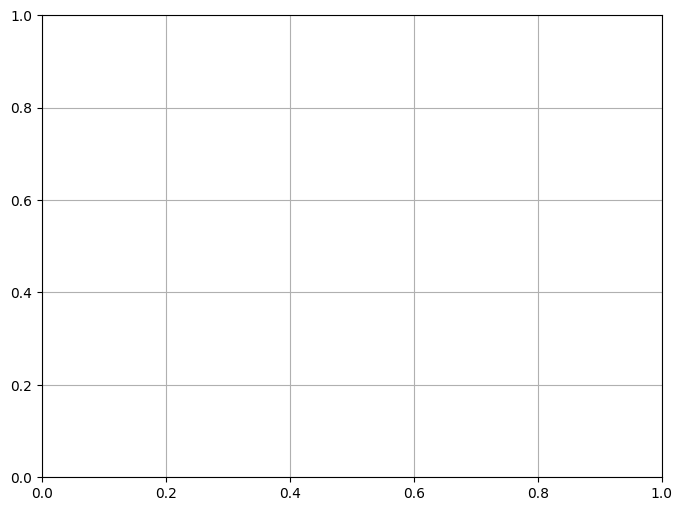

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)
plt.grid('on', zorder=0)
im = ax.imshow(acc, extent=grid.extent, zorder=2,
               cmap='cubehelix',
               norm=colors.LogNorm(1, acc.max()),
               interpolation='bilinear')
plt.colorbar(im, ax=ax, label='Upstream Cells')
plt.title('Flow Accumulation', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

C:\Users\alden.summerville\AppData\Local\Temp\ipykernel_30180\609262534.py:27: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


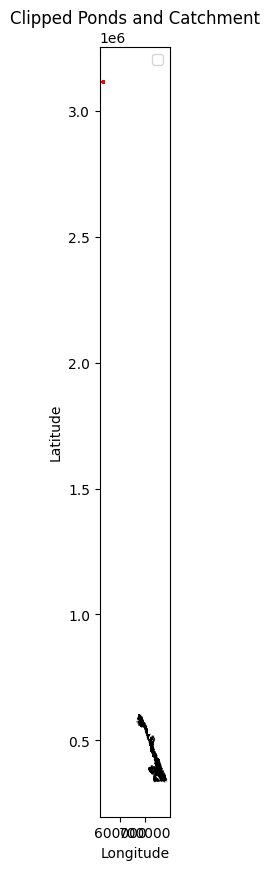

In [31]:
# fig, ax = plt.subplots(figsize=(8, 6))
# catchment_ponds.plot(ax=ax, column=pond_id, categorical=True, cmap='terrain',
#                      linewidth=0.5, edgecolor='k', alpha=1, aspect='equal')
# ax.set_xlim(grid.bbox[0], grid.bbox[2])
# ax.set_ylim(grid.bbox[1], grid.bbox[3])
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# ax.set_title('Pond types (vector)', size=14)


# Plot the clipped ponds
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the catchment polygon
catchment_gdf = gpd.GeoDataFrame(geometry=[catchment_polygon], crs=ponds.crs)
catchment_gdf.plot(ax=ax, color='none', edgecolor='red', linewidth=2, label='Catchment')

# Plot the clipped ponds
ponds.plot(ax=ax, color='blue', edgecolor='black', label='Clipped Ponds')

# Set plot title and labels
ax.set_title('Clipped Ponds and Catchment')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add legend
ax.legend()

# Show the plot
plt.show()


C:\Users\alden.summerville\AppData\Local\Temp\ipykernel_30180\1595789388.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20b', len(junctions))


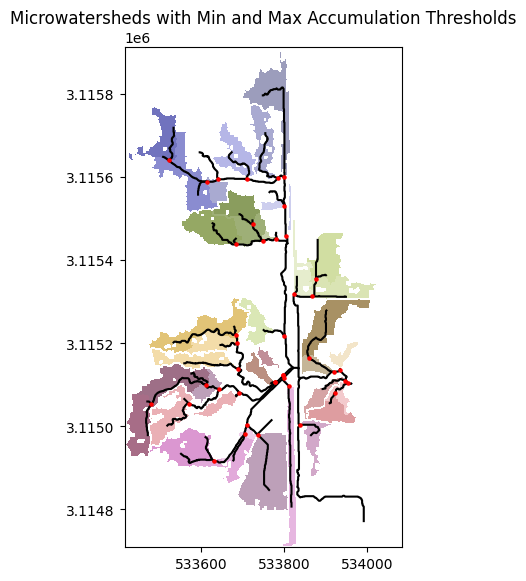

In [10]:
# area 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a figure for plotting all catchments
plt.figure(figsize=(8.5, 6.5))

# Set the plot boundaries and aspect ratio
plt.xlim(grid.bbox[0], grid.bbox[2])
plt.ylim(grid.bbox[1], grid.bbox[3])
plt.gca().set_aspect('equal')

# Define colormap for unique catchment colors
colors = plt.cm.get_cmap('tab20b', len(junctions))

# Define the minimum and maximum accumulation thresholds
min_acc = 1000
max_acc = 20000


# Loop over each junction and plot its catchment
for i, junction in enumerate(junctions):
    x, y = junction
    
    # Snap the junction to the nearest cell where accumulation is between min_acc and max_acc
    mask = (acc > min_acc) & (acc < max_acc)
    x_snap, y_snap = grid.snap_to_mask(mask, (x, y))
    
    # Delineate the catchment for the snapped point
    catch = grid.catchment(x=x_snap, y=y_snap, fdir=fdir, dirmap=dirmap, xytype='coordinate')
    
    # Plot the catchment with a unique color
    plt.imshow(np.where(catch, catch, np.nan), extent=grid.extent, cmap=mcolors.ListedColormap([colors(i)]), alpha=0.5)

# Plot the river network on top of the catchments
for branch in branches['features']:
    line = np.asarray(branch['geometry']['coordinates'])
    plt.plot(line[:, 0], line[:, 1], color='black')

# Highlight all junction points
for junction in junctions:
    x, y = junction
    x_snap, y_snap = grid.snap_to_mask(mask, (x, y))
    plt.scatter(x_snap, y_snap, color='red', s=5, zorder=5)

# Add title and show the combined plot
plt.title('Microwatersheds with Min and Max Accumulation Thresholds')
plt.show()


C:\Users\alden.summerville\AppData\Local\Temp\ipykernel_30180\1215946809.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(junctions))  # Use a colormap that supports many discrete colors


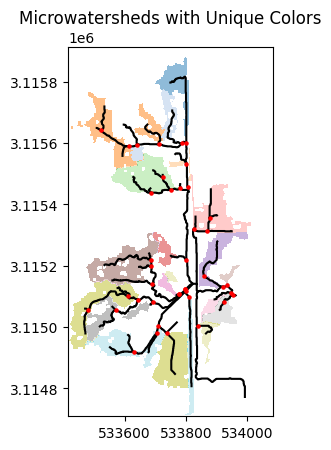

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Set the plot boundaries and aspect ratio
plt.xlim(grid.bbox[0], grid.bbox[2])
plt.ylim(grid.bbox[1], grid.bbox[3])
plt.gca().set_aspect('equal')

# Define colormap for unique catchment colors
colors = plt.cm.get_cmap('tab20', len(junctions))  # Use a colormap that supports many discrete colors

# Define the minimum and maximum accumulation thresholds
min_acc = 1000
max_acc = 20000

# Create an empty array to store the combined catchment mask
# Use integers to assign a different number for each catchment
combined_catchment = np.zeros(grid.shape, dtype=int)

# Loop over each junction and plot its catchment with a unique color
for i, junction in enumerate(junctions):
    x, y = junction
    
    # Snap the junction to the nearest cell where accumulation is between min_acc and max_acc
    mask = (acc > min_acc) & (acc < max_acc)
    x_snap, y_snap = grid.snap_to_mask(mask, (x, y))
    
    # Delineate the catchment for the snapped point
    catch = grid.catchment(x=x_snap, y=y_snap, fdir=fdir, dirmap=dirmap, xytype='coordinate')
    
    # Assign a unique integer value for each catchment
    combined_catchment[catch] = i + 1  # Start numbering catchments from 1
    
# Plot the combined catchments with a unique color for each
# Use a discrete colormap
plt.imshow(np.where(combined_catchment > 0, combined_catchment, np.nan), extent=grid.extent, cmap=colors, alpha=0.5)

# Plot the river network on top of the combined catchments
for branch in branches['features']:
    line = np.asarray(branch['geometry']['coordinates'])
    plt.plot(line[:, 0], line[:, 1], color='black')

# Highlight all junction points
for junction in junctions:
    x, y = junction
    x_snap, y_snap = grid.snap_to_mask(mask, (x, y))
    plt.scatter(x_snap, y_snap, color='red', s=5, zorder=5)

# Add title and show the combined plot
plt.title('Microwatersheds with Unique Colors')
plt.show()
